This code is referred from - https://www.youtube.com/watch?v=u3FLVbNn9Os &
                                https://www.youtube.com/watch?v=iqQgED9vV7k


In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
#loading the dataset
mnist = tf.keras.datasets.mnist
(X_train, y_train) , (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

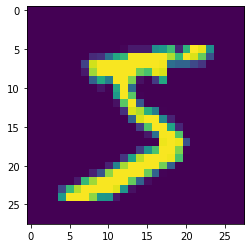

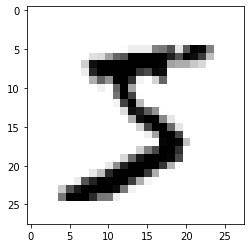

In [ ]:
plt.imshow(X_train[0])
plt.show()
plt.imshow(X_train[0], cmap = plt.cm.binary)

In [ ]:
#before normalization
print(X_train[0])

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

plt.imshow(X_train[0], cmap = plt.cm.binary)

In [ ]:
print(X_train[0]) #After normalization, we see the values between 0 and 1

In [ ]:
print(y_train[0])

5


In [ ]:
#Adding dimension for convolution filter operation
import numpy as np
IMG_SIZE = 28
X_trainD = np.array(X_train).reshape(-1, IMG_SIZE,IMG_SIZE,1)
X_testD = np.array(X_test).reshape(-1, IMG_SIZE,IMG_SIZE,1)
print("Training new sample Dimensions", X_trainD.shape)
print("Testing new sample Dimensions", X_testD.shape)

Training new sample Dimensions (60000, 28, 28, 1)
Testing new sample Dimensions (10000, 28, 28, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D

In [ ]:
#Creating Neural Network
model = Sequential()
# First Convolution Layer
model.add(Conv2D(64, (3,3), input_shape =X_trainD.shape[1:], activation = 'relu')) # 28-3+1 (26*26)
#model.add(Activation('relu')) #Activation function, NonLinear, <0 reject
model.add(MaxPooling2D(pool_size = (2,2))) # (13*13)

# Second Convolution Layer
model.add(Conv2D(64, (3,3), activation = 'relu'))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

# Third Convolution Layer
model.add(Conv2D(64, (3,3), activation = 'relu'))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

In [ ]:
###Fully flattened layer #1
model.add (Flatten())
model.add (Dense(64, activation = 'relu'))
#model.add(Activation('relu'))

#layer 2
model.add (Dense(32, activation = 'relu'))
#model.add(Activation('relu'))

#layer 3
model.add (Dense(10, activation = 'softmax')) #Last dense layer is 10 as we have 10 classes to be defined (0-9)
#model.add(Activation('softmax')) #Using softmax function at output layer as we have multi-classification


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

In [ ]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [ ]:
model.fit (X_trainD, y_train, epochs=5, validation_split = 0.3) #Training model

Epoch 1/5
1313/1313 [==============================] - 76s 57ms/step - loss: 0.2664 - accuracy: 0.9172 - val_loss: 0.1392 - val_accuracy: 0.9582
Epoch 2/5
1313/1313 [==============================] - 73s 56ms/step - loss: 0.0855 - accuracy: 0.9740 - val_loss: 0.0889 - val_accuracy: 0.9724
Epoch 3/5
1313/1313 [==============================] - 72s 55ms/step - loss: 0.0621 - accuracy: 0.9810 - val_loss: 0.0774 - val_accuracy: 0.9762
Epoch 4/5
1313/1313 [==============================] - 74s 56ms/step - loss: 0.0502 - accuracy: 0.9852 - val_loss: 0.0613 - val_accuracy: 0.9821
Epoch 5/5
1313/1313 [==============================] - 73s 56ms/step - loss: 0.0397 - accuracy: 0.9873 - val_loss: 0.0592 - val_accuracy: 0.9831


In [ ]:
test_loss, test_acc = model.evaluate(X_testD, y_test)
print("Test loss on 10000", test_loss)
print("Val Acc on 10000", test_acc)

313/313 [==============================] - 5s 15ms/step - loss: 0.0526 - accuracy: 0.9846
Test loss on 10000 0.05255160480737686
Val Acc on 10000 0.9846000075340271


In [ ]:
y_predictions = model.predict([X_testD])

313/313 [==============================] - 5s 15ms/step


In [ ]:
print (y_predictions)

[[4.7335775e-09 9.1914927e-07 2.5909990e-06 ... 9.9999255e-01
  6.5993668e-09 5.3505579e-07]
 [2.2219248e-05 3.4947183e-07 9.9996883e-01 ... 5.7091103e-07
  9.8400847e-07 1.4807526e-08]
 [1.4560086e-06 9.9994940e-01 4.2181799e-07 ... 2.8421442e-05
  6.7300889e-06 5.9882888e-07]
 ...
 [4.9452936e-10 1.8432000e-07 1.2502110e-10 ... 6.5541684e-08
  5.4274853e-08 1.8949693e-07]
 [7.2531593e-06 4.0246801e-09 6.5051630e-08 ... 5.8816880e-09
  4.5124398e-04 7.3857940e-05]
 [8.1665727e-05 9.3916782e-08 1.7465531e-05 ... 3.1834954e-08
  1.6385387e-04 6.1499429e-07]]


Predicted number is:  9


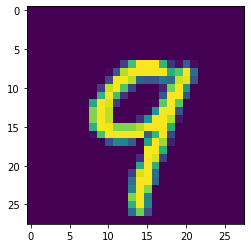

In [ ]:
plt.imshow(X_test[12])
plt.show
print ("Predicted number is: ",  np.argmax(y_predictions[12]))

Text(69.0, 0.5, 'Truth')

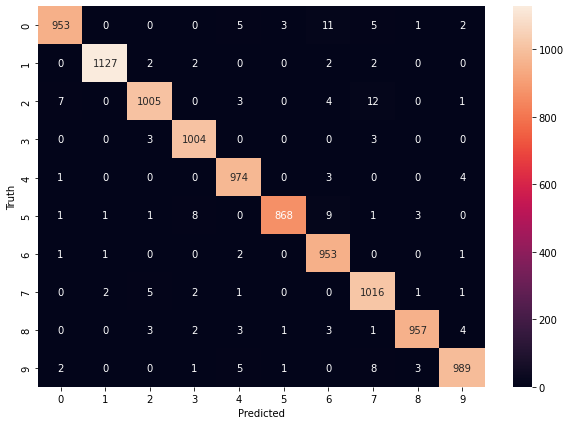

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predictions]
confusion_matrix = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
